In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
# Load the data into a pandas DataFrame
data = pd.read_csv('Applications_for_Machine_Learning_internship_edited.xlsx - Sheet1.csv')

In [3]:
data.head()

,Name,Python (out of 3),Machine Learning (out of 3),Natural Language Processing (NLP) (out of 3),Deep Learning (out of 3),Other skills,"Are you available for 3 months, starting immediately, for a full-time work from home internship?",Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
0,NaN,1,0,0,1,"MS-Excel, MS-Word, Deep Learning, MySQL, Pytho...","Yes, I am available for 3 months starting imme...",Bachelor of Vocation (B.Voc.),Software Engineering,2021,NaN,6.50/7,NaN,NaN
1,NaN,2,0,0,0,"Git, GitHub, Linux, Adobe After Effects, Adobe...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science & Engineering,2024,NaN,8.90/10,NaN,NaN
2,NaN,2,2,0,0,"Amazon Web Services (AWS), Docker, Hadoop, MS-...","Yes, I am available for 3 months starting imme...",Master of Science (M.S.),Data Science And Analytics,2022,NaN,NaN,NaN,NaN
3,NaN,3,2,2,0,"Adobe XD, BIG DATA ANALYTICS, Canva, Data Anal...","Yes, I am available for 3 months starting imme...",Bachelor of Engineering (B.E),NaN,2024,NaN,NaN,85.60/85.60,10.00/10.00
4,NaN,2,2,0,0,"C++ Programming, Data Science, Machine Learnin...","Yes, I am available for 3 months starting imme...",B.Tech,Computer Science,2023,NaN,8.10/10,93.40/93.40,10.00/10.00


In [4]:
data.shape

(1136, 14)

In [5]:
# Descriptive Analysis
data.describe()

,Name,Python (out of 3),Machine Learning (out of 3),Natural Language Processing (NLP) (out of 3),Deep Learning (out of 3),Current Year Of Graduation
count,0.0,1136.000000,1136.000000,1136.000000,1136.000000,1136.000000
mean,NaN,1.792254,1.300176,0.497359,0.662852,1994.375000
std,NaN,0.917270,1.016446,0.861303,0.938587,238.489554
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,1.000000,0.000000,0.000000,0.000000,2023.000000
50%,NaN,2.000000,2.000000,0.000000,0.000000,2023.000000
75%,NaN,2.000000,2.000000,1.000000,1.000000,2024.000000
max,NaN,3.000000,3.000000,3.000000,3.000000,2027.000000


In [6]:
data.dtypes

Name                                                                                                 float64
Python (out of 3)                                                                                      int64
Machine Learning (out of 3)                                                                            int64
Natural Language Processing (NLP) (out of 3)                                                           int64
Deep Learning (out of 3)                                                                               int64
Other skills                                                                                          object
Are you available for 3 months, starting immediately, for a full-time work from home internship?      object
Degree                                                                                                object
Stream                                                                                                object
Current Year Of Gra

In [7]:
#missing values

data.isna().sum()

Name                                                                                                 1136
Python (out of 3)                                                                                       0
Machine Learning (out of 3)                                                                             0
Natural Language Processing (NLP) (out of 3)                                                            0
Deep Learning (out of 3)                                                                                0
Other skills                                                                                           66
Are you available for 3 months, starting immediately, for a full-time work from home internship?        0
Degree                                                                                                 43
Stream                                                                                                170
Current Year Of Graduation                    

In [8]:
# Dropping Name Column
data.drop(columns=['Name'], inplace=True)

In [9]:
data.dropna(subset=['Other skills'], inplace = True)
data.dropna(subset=['Degree'], inplace=True)
data.dropna(subset=['Stream'], inplace=True)
data.dropna(subset=['Performance_PG'], inplace=True)
data.dropna(subset=['Performance_UG'], inplace=True)
data.dropna(subset=['Performance_12'], inplace=True)
data.dropna(subset=['Performance_10'], inplace=True)

In [10]:
# Checking for missing values

data.isna().sum()

Python (out of 3)                                                                                    0
Machine Learning (out of 3)                                                                          0
Natural Language Processing (NLP) (out of 3)                                                         0
Deep Learning (out of 3)                                                                             0
Other skills                                                                                         0
Are you available for 3 months, starting immediately, for a full-time work from home internship?     0
Degree                                                                                               0
Stream                                                                                               0
Current Year Of Graduation                                                                           0
Performance_PG                                                           

In [11]:
#Checking for Duplicate data
data.duplicated()

10      False
18      False
29      False
72      False
97      False
120     False
184     False
220     False
246     False
261     False
285     False
359     False
406     False
421     False
434     False
586     False
671     False
672     False
679     False
702     False
737     False
829     False
870     False
917     False
1005    False
1014    False
1031    False
1065    False
1073    False
1094    False
1098    False
dtype: bool

In [12]:
data.head()

,Python (out of 3),Machine Learning (out of 3),Natural Language Processing (NLP) (out of 3),Deep Learning (out of 3),Other skills,"Are you available for 3 months, starting immediately, for a full-time work from home internship?",Degree,Stream,Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10
10,2,0,0,0,"MS-Excel, MS-PowerPoint, Power BI, Python, R P...","Yes, I am available for 3 months starting imme...",MBA,Analytics And Finance,2023,7.45/8,83.65/100,74.50/74.50,9.60/9.60
18,0,2,0,0,"Data Analytics, HTML, Machine Learning, CSS, Java","Yes, I am available for 3 months starting imme...",Master of Computer Applications (MCA),Computer Applications,2023,8.20/10,8.30/10,92.00/92.00,95.00/95.00
29,2,2,1,1,"Cloud Computing, Amazon Web Services (AWS), C ...","Yes, I am available for 3 months starting imme...",Master of Computer Applications (MCA),Networks And Communication,2023,5.54/10,7.28/10,59.30/59.30,7.00/7.00
72,1,0,0,0,"Apache Kafka, SQLite, Hadoop, Python, SQL","Yes, I am available for 3 months starting imme...",Master of Computer Applications (MCA),Computer Application,2022,78.98/100,62.54/100,45.38/45.38,60.20/60.20
97,2,2,0,0,"Canva, LaTeX, MS-Word, Data Analytics, Data Sc...","No, Since I am a student , I am available for ...",M.Sc. in Data Science,Data Science,2024,3.33/4,8.48/10,93.80/93.80,90.00/90.00


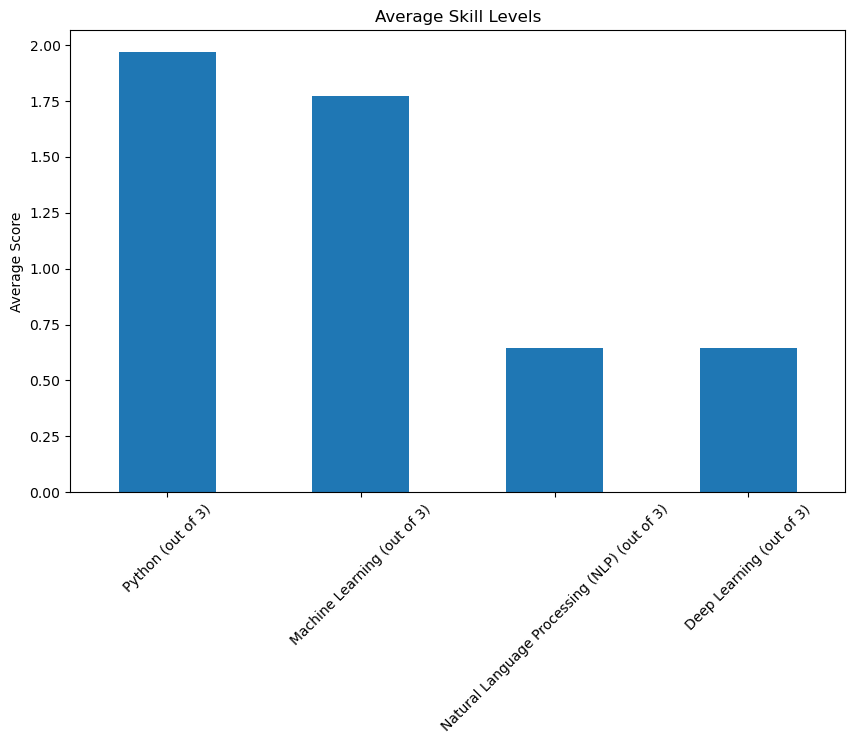

In [13]:
# Bar plot for Python, Machine Learning, NLP, and Deep Learning columns
plt.figure(figsize=(10, 6))
data[['Python (out of 3)', 'Machine Learning (out of 3)', 'Natural Language Processing (NLP) (out of 3)', 'Deep Learning (out of 3)']].mean().plot(kind='bar')
plt.title('Average Skill Levels')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()

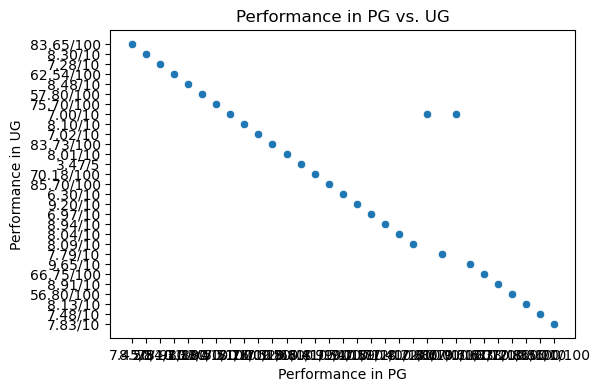

In [14]:
# Scatter plot for 'Performance_PG' and 'Performance_UG' columns
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Performance_PG', y='Performance_UG', data=data)
plt.title('Performance in PG vs. UG')
plt.xlabel('Performance in PG')
plt.ylabel('Performance in UG')
plt.show()

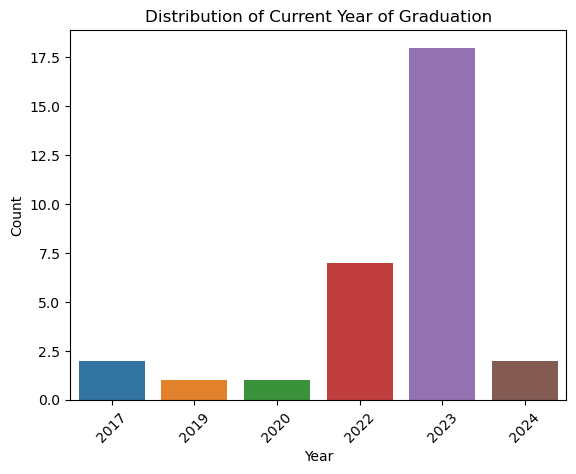

In [15]:
sns.barplot(x=(data['Current Year Of Graduation'].value_counts()).index, y=data['Current Year Of Graduation'].value_counts())
plt.title('Distribution of Current Year of Graduation')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

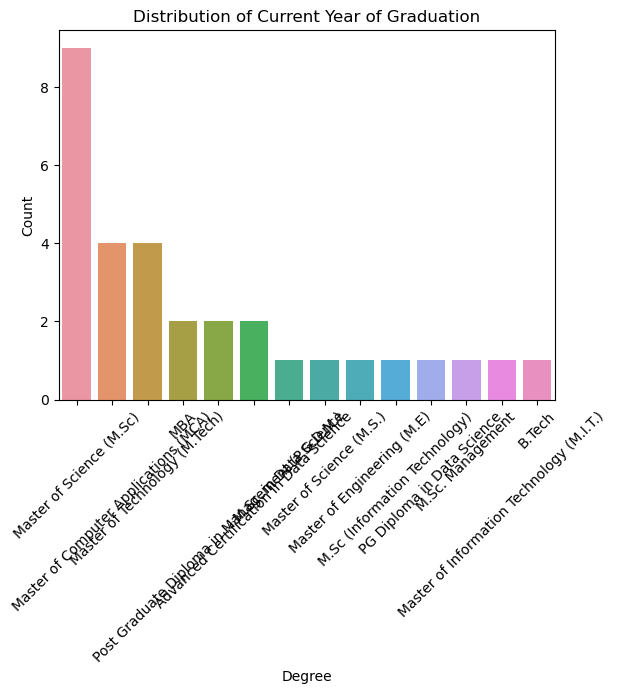

In [16]:
sns.barplot(x=(data['Degree'].value_counts()).index, y=data['Degree'].value_counts())
plt.title('Distribution of Current Year of Graduation')
plt.xlabel('Degree')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [17]:
#Renaming the 5th column  cor our convinience to read
column_index_to_rename = 5
new_column_name = 'availability'  # Providing a new name for the column

data.rename(columns={data.columns[column_index_to_rename]: new_column_name}, inplace=True)

In [18]:
data=pd.get_dummies(data,columns=['Other skills'])
data=pd.get_dummies(data,columns=['availability'])
data=pd.get_dummies(data,columns=['Degree'])
data=pd.get_dummies(data,columns=['Stream'])

In [19]:
data['Performance_PG'] = data['Performance_PG'].apply(lambda x: float(x.split('/')[0]))
data['Performance_UG'] = data['Performance_UG'].apply(lambda x: float(x.split('/')[0]))
data['Performance_12'] = data['Performance_12'].apply(lambda x: float(x.split('/')[0]))
data['Performance_10'] = data['Performance_10'].apply(lambda x: float(x.split('/')[0]))

In [20]:
data.head()

,Python (out of 3),Machine Learning (out of 3),Natural Language Processing (NLP) (out of 3),Deep Learning (out of 3),Current Year Of Graduation,Performance_PG,Performance_UG,Performance_12,Performance_10,"Other skills_Algorithms, Artificial intelligence, Computer Vision, Data Science, Data Structures, Deep Learning, GitHub, Image Processing, Linux, Machine Learning, Neural Networks, OpenCV, Python, C++ Programming",...,Stream_Electrical and Electronics Engineering,Stream_Information Technology,Stream_Information Technology (Data Science),Stream_Machine Learning,Stream_Marketing,Stream_Mechanical,Stream_Nanotechnology,Stream_Networks And Communication,Stream_Operations,Stream_Statistics
10,2,0,0,0,2023,7.45,83.65,74.50,9.6,0,...,0,0,0,0,0,0,0,0,0,0
18,0,2,0,0,2023,8.20,8.30,92.00,95.0,0,...,0,0,0,0,0,0,0,0,0,0
29,2,2,1,1,2023,5.54,7.28,59.30,7.0,0,...,0,0,0,0,0,0,0,1,0,0
72,1,0,0,0,2022,78.98,62.54,45.38,60.2,0,...,0,0,0,0,0,0,0,0,0,0
97,2,2,0,0,2024,3.33,8.48,93.80,90.0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#Setting threshold as 75.0
data['Performance_UG'] = data['Performance_UG'].apply(lambda x: 1 if x >= 75.0 else 0)

In [22]:
x=data.drop('Performance_UG',axis=1)
y=data['Performance_UG']

In [23]:
x.head()

,Python (out of 3),Machine Learning (out of 3),Natural Language Processing (NLP) (out of 3),Deep Learning (out of 3),Current Year Of Graduation,Performance_PG,Performance_12,Performance_10,"Other skills_Algorithms, Artificial intelligence, Computer Vision, Data Science, Data Structures, Deep Learning, GitHub, Image Processing, Linux, Machine Learning, Neural Networks, OpenCV, Python, C++ Programming","Other skills_Apache Kafka, SQLite, Hadoop, Python, SQL",...,Stream_Electrical and Electronics Engineering,Stream_Information Technology,Stream_Information Technology (Data Science),Stream_Machine Learning,Stream_Marketing,Stream_Mechanical,Stream_Nanotechnology,Stream_Networks And Communication,Stream_Operations,Stream_Statistics
10,2,0,0,0,2023,7.45,74.50,9.6,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,2,0,0,2023,8.20,92.00,95.0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,2,2,1,1,2023,5.54,59.30,7.0,0,0,...,0,0,0,0,0,0,0,1,0,0
72,1,0,0,0,2022,78.98,45.38,60.2,0,1,...,0,0,0,0,0,0,0,0,0,0
97,2,2,0,0,2024,3.33,93.80,90.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
y.head()

10    1
18    0
29    0
72    0
97    0
Name: Performance_UG, dtype: int64

In [25]:
# Count the occurrences of each unique value in the 'Performance_UG' column
value_counts = y.value_counts()

In [26]:
# Display the unique values and their occurrences in descending order
print(value_counts)

0    27
1     4
Name: Performance_UG, dtype: int64


In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [28]:
rf=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)

In [29]:
#training the model
rf.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [30]:
#test the model
pred=rf.predict(x_test)

In [31]:
pred

array([0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [32]:
y_test

29      0
1094    0
421     0
285     1
1065    0
1014    0
870     0
Name: Performance_UG, dtype: int64

In [33]:
# Evaluate the model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [34]:
accuracy=accuracy_score(y_test,pred)
conmat=confusion_matrix(y_test,pred)

In [35]:
print(accuracy)

0.8571428571428571


In [36]:
print(conmat)

[[6 0]
 [1 0]]


In [37]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       0.00      0.00      0.00         1

    accuracy                           0.86         7
   macro avg       0.43      0.50      0.46         7
weighted avg       0.73      0.86      0.79         7



C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
best_intern = data[data['Performance_UG'] == 1]
not_best_intern = data[data['Performance_UG'] == 0]

In [39]:
print(best_intern)

     Python (out of 3)  Machine Learning (out of 3)  \
10                   2                            0   
184                  2                            2   
285                  2                            2   
434                  2                            0   

     Natural Language Processing (NLP) (out of 3)  Deep Learning (out of 3)  \
10                                              0                         0   
184                                             0                         0   
285                                             0                         0   
434                                             0                         0   

     Current Year Of Graduation  Performance_PG  Performance_UG  \
10                         2023            7.45               1   
184                        2017           88.50               1   
285                        2023            7.52               1   
434                        2023            8.99             

In [40]:
print(not_best_intern)

      Python (out of 3)  Machine Learning (out of 3)  \
18                    0                            2   
29                    2                            2   
72                    1                            0   
97                    2                            2   
120                   2                            2   
220                   2                            1   
246                   3                            3   
261                   0                            0   
359                   3                            3   
406                   3                            3   
421                   3                            3   
586                   2                            3   
671                   2                            2   
672                   2                            1   
679                   2                            2   
702                   2                            1   
737                   3                         

In [49]:
print("Number of best_intern:", len(best_intern))
print("Number of not_best_intern:", len(not_best_intern))

Number of best_intern: 4
Number of not_best_intern: 27
